# Importe de librerías y carga de base de datos

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import MissingIndicator 
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy import special

: 

In [ ]:
data = pd.read_csv('https://drive.google.com/uc?export=download&id=1TrofkCr4N0xq5ymH3Qj0YqTlOIsGLZJJ', sep = ';')


Se elimina la variable 'Fecha', dado que, ya se encuentra duplicada en la base de datos

In [ ]:
data = data.drop('Fecha',axis=1)
data

,Date,Cierre,Apertura,Máximo,Mínimo,var%,Bitcoin,CAC40,DAX,DowJones,EuroStoxx50,HangSeng,IBEX35,Nasdaq100,S&P500,Shangai,FTSE_GB,WTI_USD,Tendencia
0,06/12/2021,1.1281,1.1304,1.1311,1.1267,-0.20,48909.1,6865.78,15380.79,35304.13,4137.11,23349.38,8439.7,15817.47,NaN,3590.01,7232.28,69.33,Bajo
1,05/12/2021,1.1305,1.1321,1.1321,1.1301,-0.08,49405.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.95,Bajo
2,03/12/2021,1.1313,1.1301,1.1334,1.1265,0.12,53631.5,6765.52,15169.98,34579.55,4080.15,23766.69,8241.7,15712.04,7704.3,3607.43,7122.32,66.74,Subio
3,02/12/2021,1.1299,1.1320,1.1349,1.1294,-0.18,56496.0,6795.75,15263.11,34641.70,4108.02,23788.93,8300.8,15990.76,7762.5,3573.84,7129.21,67.84,Bajo
4,01/12/2021,1.1319,1.1339,1.1360,1.1302,-0.15,57210.3,6881.87,15472.67,34021.61,4179.15,23658.92,8452.6,15877.72,7530.0,3576.89,7168.68,66.77,Bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4412,07/01/2005,1.3054,1.3171,1.3251,1.3024,-0.89,NaN,3877.96,4316.40,10603.96,NaN,13574.86,9041.1,1564.81,NaN,1244.75,4854.10,45.52,Bajo
4413,06/01/2005,1.3171,1.3262,1.3286,1.3156,-0.69,NaN,3856.48,4300.94,10622.88,NaN,13712.04,NaN,1557.52,NaN,1239.43,4824.30,43.17,Bajo
4414,05/01/2005,1.3262,1.3282,1.3305,1.3215,-0.08,NaN,3829.36,4258.24,10597.83,NaN,13764.36,9024.4,1563.76,NaN,1251.94,4806.00,43.34,Bajo
4415,04/01/2005,1.3272,1.3466,1.3496,1.3249,-1.42,NaN,3863.30,4290.50,10630.78,NaN,14045.90,9120.0,1571.83,NaN,1242.77,4847.00,42.28,Bajo


In [ ]:
data.describe()

,Cierre,Apertura,Máximo,Mínimo,var%,Bitcoin,CAC40,DAX,DowJones,EuroStoxx50,HangSeng,IBEX35,Nasdaq100,S&P500,Shangai,FTSE_GB,WTI_USD
count,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,2972.000000,4334.000000,4304.000000,4262.000000,2646.000000,4201.000000,4325.000000,4262.000000,3776.000000,4113.000000,4278.000000,4290.000000
mean,1.257708,1.257734,1.263124,1.252336,-0.002574,6649.796938,4603.265868,8913.656766,17116.746354,3196.755646,22536.451021,10011.581642,4440.216147,4535.707548,2790.141221,6221.138721,69.444124
std,0.123062,0.123032,0.123896,0.122015,0.569793,13181.476944,900.168285,3119.645165,7009.877053,477.715197,4334.011095,1908.318696,3465.290423,1730.920832,841.083727,861.261571,23.015534
min,1.038700,1.038900,1.041900,1.034100,-2.740000,0.100000,2519.290000,3666.410000,6547.050000,1995.010000,11015.840000,5956.300000,1036.510000,885.300000,1011.500000,3512.100000,7.790000
25%,1.145200,1.145200,1.149000,1.139400,-0.320000,105.625000,3914.740000,6198.740000,11459.140000,2935.645000,20147.870000,8756.000000,1851.675000,3016.150000,2227.120000,5681.417500,52.522500
50%,1.255900,1.255300,1.262000,1.250800,0.000000,609.650000,4536.510000,8169.755000,15059.660000,3244.725000,22791.280000,9727.500000,2991.235000,4829.500000,2871.700000,6243.835000,66.035000
75%,1.346900,1.347500,1.353100,1.341900,0.300000,7549.925000,5285.557500,11686.442500,21912.842500,3510.697500,25500.060000,10826.900000,5948.390000,5951.725000,3251.120000,6863.745000,88.080000
max,1.598800,1.600000,1.603900,1.586500,3.800000,67527.900000,7156.850000,16251.130000,36431.390000,4401.490000,33154.120000,15945.700000,16573.340000,8212.600000,6092.060000,7877.450000,145.410000


# Análisis Exploratorio de los Datos

Se evidencia que la base de datos presenta datos faltantes. En las próximas secciones se presentará la imputación de datos correspondiente

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4417 entries, 0 to 4416
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4417 non-null   object 
 1   Cierre       4417 non-null   float64
 2   Apertura     4417 non-null   float64
 3   Máximo       4417 non-null   float64
 4   Mínimo       4417 non-null   float64
 5   var%         4417 non-null   float64
 6   Bitcoin      2972 non-null   float64
 7   CAC40        4334 non-null   float64
 8   DAX          4304 non-null   float64
 9   DowJones     4262 non-null   float64
 10  EuroStoxx50  2646 non-null   float64
 11  HangSeng     4201 non-null   float64
 12  IBEX35       4325 non-null   float64
 13  Nasdaq100    4262 non-null   float64
 14  S&P500       3776 non-null   float64
 15  Shangai      4113 non-null   float64
 16  FTSE_GB      4278 non-null   float64
 17  WTI_USD      4290 non-null   float64
 18  Tendencia    4417 non-null   object 
dtypes: flo

Se realizó la búsqueda de valores que pudieran contener letras y/o simbolos. Se espera encontrar únicamente valores númericos de tipo int y de tipo float.

In [ ]:
F1 = list(data['Date'].value_counts().index)
F2 = list(data['Cierre'].value_counts().index)
F3 = list(data['Apertura'].value_counts().index)
F4 = list(data['Máximo'].value_counts().index)
F5 = list(data['Mínimo'].value_counts().index)
F6 = list(data['var%'].value_counts().index)
F7 = list(data['Bitcoin'].value_counts().index)
F8 = list(data['CAC40'].value_counts().index)
F9 = list(data['DAX'].value_counts().index)
F10 = list(data['DowJones'].value_counts().index)
F11 = list(data['EuroStoxx50'].value_counts().index)
F12 = list(data['HangSeng'].value_counts().index)
F13 = list(data['Nasdaq100'].value_counts().index)
F14 = list(data['S&P500'].value_counts().index)
F15 = list(data['Shangai'].value_counts().index)
F16 = list(data['FTSE_GB'].value_counts().index)
F17 = list(data['WTI_USD'].value_counts().index)
C = list(data['Tendencia'].value_counts().index)

In [ ]:
list_var = [F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,C]

j = 0
for index, list_var in enumerate(list_var):
    #print(index, list_var)
    i = 0
    vector = list_var
    
    for k in range(0,len(vector)):
      if type(vector[k]) != float and type(vector[k]) != int:
        i += 1
        print(f'Índice {index}  Valor {vector[k]}')
        
    #   if type(vector[k]) != str:
    #     j += 1
    #     #print('Its a number')
    # #print(index, i)
    # #print(index, j)
    #   #print(type(vector[k]))

De acuerdo con los resultados obtenidos, ninguna de las variables excepto por la característica Fecha y Tendencia, contiene valores de tipo cadena de texto. Por tanto, a contiación se presenta la identificación de las variables con valores faltantes y la imputación de datos. Resaltar que, la variable Bitcoin y EuroStoxx50 son las que presentan la mayor cantidad de datos faltantes, en el primer caso, se debe a la fecha de aparición de Bitcoin en el mercdo y en el caso de EuroStoxx50 se debe (.)

In [ ]:
Indicador = MissingIndicator(missing_values = np.nan) 
Indicador.fit(data) 
Datos_Indicador = Indicador.transform(data) 
#display(Datos_Indicador) 
print(f'Características donde hay datos faltantes: "{Indicador.features_}')
POS = np.where(Datos_Indicador == True) # Se busca aquellos datos que tiene un valor Booleanos igual a True
print(f'Porcentaje de Datos Faltantes: " {round(100*(len(POS[0])/(Datos_Indicador.shape[0]*Datos_Indicador.shape[1])),3)}%')

Características donde hay datos faltantes: "[ 6  7  8  9 10 11 12 13 14 15 16 17]
Porcentaje de Datos Faltantes: " 9.888%


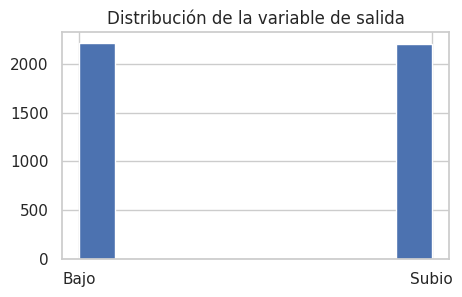

In [ ]:
categorias = data['Tendencia'].groupby(data['Tendencia']).count()
categorias
plt.figure(figsize=(5,3))
plt.title('Distribución de la variable de salida')
data['Tendencia'].hist()


En relación con el gráfico anterior, no se observa desbalance de datos, por lo cual, no es necesario realizar la imputación de datos a través de estrategias como Smote. La imputación de los datos se realizó mediante el valor de la media, el valor más frecuente y los k-vecinos cercanos con variaciones en 5, 7, 9 y 11. 

# Imputación de datos

In [ ]:
nombres = ['Cierre','Apertura','Máximo','Mínimo','var%','Bitcoin','CAC40','DAX','DowJones','EuroStoxx50','HangSeng','IBEX35','Nasdaq100','S&P500','Shangai','FTSE_GB','WTI_USD']
data_IMedia = data[['Cierre','Apertura','Máximo','Mínimo','var%','Bitcoin','CAC40','DAX','DowJones','EuroStoxx50','HangSeng','IBEX35','Nasdaq100','S&P500','Shangai','FTSE_GB','WTI_USD']]
imp = SimpleImputer(missing_values = np.nan, strategy= 'mean')
imp.fit(data_IMedia) 
data_IMedia = imp.transform(data_IMedia) 
data_IMedia = pd.DataFrame(data_IMedia, columns = nombres)
data_IMedia.describe()
#data_IMedia.info()

,Cierre,Apertura,Máximo,Mínimo,var%,Bitcoin,CAC40,DAX,DowJones,EuroStoxx50,HangSeng,IBEX35,Nasdaq100,S&P500,Shangai,FTSE_GB,WTI_USD
count,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000
mean,1.257708,1.257734,1.263124,1.252336,-0.002574,6649.796938,4603.265868,8913.656766,17116.746354,3196.755646,22536.451021,10011.581642,4440.216147,4535.707548,2790.141221,6221.138721,69.444124
std,0.123062,0.123032,0.123896,0.122015,0.569793,10811.871312,891.668695,3079.472569,6885.756102,369.715249,4226.687423,1888.335750,3403.931980,1600.372759,811.617216,847.598466,22.682167
min,1.038700,1.038900,1.041900,1.034100,-2.740000,0.100000,2519.290000,3666.410000,6547.050000,1995.010000,11015.840000,5956.300000,1036.510000,885.300000,1011.500000,3512.100000,7.790000
25%,1.145200,1.145200,1.149000,1.139400,-0.320000,330.000000,3928.580000,6236.960000,11559.950000,3150.950000,20327.720000,8769.500000,1873.430000,3149.100000,2282.870000,5702.100000,52.840000
50%,1.255900,1.255300,1.262000,1.250800,0.000000,6649.796938,4560.610000,8398.380000,15521.970000,3196.755646,22577.010000,9778.700000,3244.660000,4535.707548,2810.950000,6221.138721,67.050000
75%,1.346900,1.347500,1.353100,1.341900,0.300000,6649.796938,5275.640000,11604.780000,21413.440000,3333.490000,25244.020000,10803.600000,5838.080000,5609.800000,3217.930000,6840.890000,87.420000
max,1.598800,1.600000,1.603900,1.586500,3.800000,67527.900000,7156.850000,16251.130000,36431.390000,4401.490000,33154.120000,15945.700000,16573.340000,8212.600000,6092.060000,7877.450000,145.410000


In [ ]:
data_IVf = data[['Cierre','Apertura','Máximo','Mínimo','var%','Bitcoin','CAC40','DAX','DowJones','EuroStoxx50','HangSeng','IBEX35','Nasdaq100','S&P500','Shangai','FTSE_GB','WTI_USD']]
imp = SimpleImputer(missing_values = np.nan, strategy= 'most_frequent') 
imp.fit(data_IVf)
data_IVf = imp.transform(data_IVf)
#print(DatosF_Imp_Vf)
data_IVf = pd.DataFrame(data_IVf, columns = nombres)
data_IVf.describe()

,Cierre,Apertura,Máximo,Mínimo,var%,Bitcoin,CAC40,DAX,DowJones,EuroStoxx50,HangSeng,IBEX35,Nasdaq100,S&P500,Shangai,FTSE_GB,WTI_USD
count,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000,4417.000000
mean,1.257708,1.257734,1.263124,1.252336,-0.002574,4474.381028,4576.011992,8804.052221,16849.787494,2833.315474,22487.575898,9974.488341,4338.989737,4249.469549,2808.217333,6207.618282,68.761995
std,0.123062,0.123032,0.123896,0.122015,0.569793,11253.096797,913.163272,3152.906273,7026.641756,578.000050,4232.181070,1905.389571,3445.079141,1744.691393,814.336693,850.911591,23.026113
min,1.038700,1.038900,1.041900,1.034100,-2.740000,0.100000,2519.290000,3666.410000,6547.050000,1995.010000,11015.840000,5956.300000,1036.510000,885.300000,1011.500000,3512.100000,7.790000
25%,1.145200,1.145200,1.149000,1.139400,-0.320000,0.100000,3870.000000,6084.340000,11215.700000,2290.310000,20327.720000,8694.800000,1804.840000,2563.300000,2282.870000,5702.100000,51.440000
50%,1.255900,1.255300,1.262000,1.250800,0.000000,111.400000,4511.510000,7968.540000,14127.820000,2683.920000,22577.010000,9684.200000,2799.190000,3772.100000,2915.700000,6203.900000,65.110000
75%,1.346900,1.347500,1.353100,1.341900,0.300000,3580.100000,5275.640000,11604.780000,21413.440000,3333.490000,25244.020000,10803.600000,5838.080000,5609.800000,3217.930000,6840.890000,87.420000
max,1.598800,1.600000,1.603900,1.586500,3.800000,67527.900000,7156.850000,16251.130000,36431.390000,4401.490000,33154.120000,15945.700000,16573.340000,8212.600000,6092.060000,7877.450000,145.410000


In [ ]:
data_KN5 = data[['Cierre','Apertura','Máximo','Mínimo','var%','Bitcoin','CAC40','DAX','DowJones','EuroStoxx50','HangSeng','IBEX35','Nasdaq100','S&P500','Shangai','FTSE_GB','WTI_USD']]
imp = KNNImputer(missing_values = np.nan, n_neighbors = 5, weights = 'uniform') 
imp.fit(data_KN5)
data_KN5 = imp.transform(data_KN5)
#print(DatosF_Imp_Vf)
data_KN5 = pd.DataFrame(data_KN5, columns = nombres)


In [ ]:
data_KN7 = data[['Cierre','Apertura','Máximo','Mínimo','var%','Bitcoin','CAC40','DAX','DowJones','EuroStoxx50','HangSeng','IBEX35','Nasdaq100','S&P500','Shangai','FTSE_GB','WTI_USD']]
imp = KNNImputer(missing_values = np.nan, n_neighbors = 7, weights = 'uniform') 
imp.fit(data_KN7)
data_KN7 = imp.transform(data_KN7)
#print(DatosF_Imp_Vf)
data_KN7 = pd.DataFrame(data_KN7, columns = nombres)


In [ ]:
data_KN9 = data[['Cierre','Apertura','Máximo','Mínimo','var%','Bitcoin','CAC40','DAX','DowJones','EuroStoxx50','HangSeng','IBEX35','Nasdaq100','S&P500','Shangai','FTSE_GB','WTI_USD']]
imp = KNNImputer(missing_values = np.nan, n_neighbors = 9, weights = 'uniform') 
imp.fit(data_KN9)
data_KN9 = imp.transform(data_KN9)
#print(DatosF_Imp_Vf)
data_KN9 = pd.DataFrame(data_KN9, columns = nombres)


In [ ]:
data_KN11 = data[['Cierre','Apertura','Máximo','Mínimo','var%','Bitcoin','CAC40','DAX','DowJones','EuroStoxx50','HangSeng','IBEX35','Nasdaq100','S&P500','Shangai','FTSE_GB','WTI_USD']]
imp = KNNImputer(missing_values = np.nan, n_neighbors = 11, weights = 'uniform') 
imp.fit(data_KN11)
data_KN11 = imp.transform(data_KN11)
#print(DatosF_Imp_Vf)
data_KN11 = pd.DataFrame(data_KN11, columns = nombres)

In [ ]:
Mmean= pd.DataFrame(data.mean(), columns=['Media Natural'])
Mmean = Mmean.assign(IMedia = data_IMedia.mean(), VFrecuentes = data_IVf.mean(), KV5 = data_KN5.mean(),KV7 = data_KN7.mean(), KV9 = data_KN9.mean(), KV11 = data_KN11.mean())


# Elección de la estrategía de imputación de datos

In [ ]:
Mmean_dif = pd.DataFrame(abs(Mmean['Media Natural']-Mmean['IMedia']),columns=['Dif_IMedia'])
Mmean_dif = Mmean_dif.assign(Dif_VFrec = abs(Mmean['Media Natural']-Mmean['VFrecuentes']),
                    Dif_KV5 = abs(Mmean['Media Natural']-Mmean['KV5']),
                    Dif_KV7 = abs(Mmean['Media Natural'] - Mmean['KV7']),
                    Dif_KV9 = abs(Mmean['Media Natural'] - Mmean['KV9']),
                    Dif_KV11 = abs(Mmean['Media Natural'] - Mmean['KV11'])
                    )


La estrategía elegida para la imputación de los datos, en un principio, estuvo encaminada a analizar el comportamiento de la media y la desviación estándar respecto de los datos, es decir que, el criterio de evaluación planteado, elige la estrategía con las métricas obtenidas luego de la imputación de datos y cercanas al valor de la media y desviación estándar de los datos en bruto. No obstante, de acuerdo con las condiciones de la base de datos, el criterio propuesto en principio, no cumple con los resultados esperados y por tanto se elige la estrategía a través del análisis de los datos imputados en cada uno de los casos. 

De acuerdo a lo expresado, se observa que la imputación de datos a través del valor más frecuente, tiene un buen desempeño, y los datos imputados guardan relación con el comportamiento previsto en el conjunto de datos previo a la imputación

A continuación se presentan los variables cuyos casos son particulares, dado la alta cantidad de datos faltantes en la base de datos. 

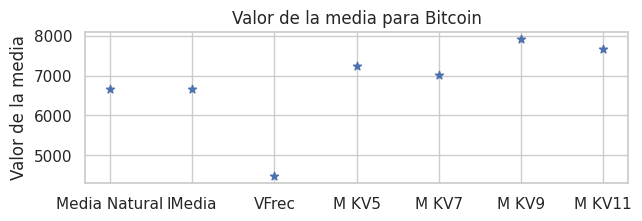

In [ ]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,2), 'figure.dpi':100})
vec_imp = ['Media Natural','IMedia','VFrec','M KV5','M KV7','M KV9','M KV11']
arr = Mmean.iloc[5]
plt.Figure(figsize=(2,3))
plt.scatter(vec_imp, arr,marker= '*')
plt.title('Valor de la media para Bitcoin')
plt.ylabel('Valor de la media')
plt.show()

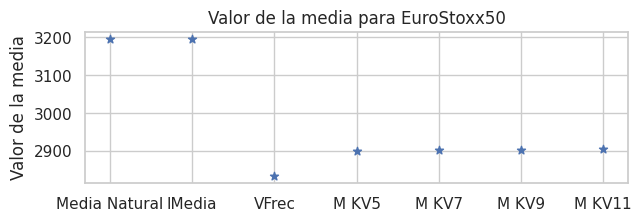

In [ ]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,2), 'figure.dpi':100})
vec_imp = ['Media Natural','IMedia','VFrec','M KV5','M KV7','M KV9','M KV11']
arr = Mmean.iloc[9]
plt.Figure(figsize=(2,3))
plt.scatter(vec_imp, arr,marker= '*')
plt.title('Valor de la media para EuroStoxx50')
plt.ylabel('Valor de la media')
plt.show()

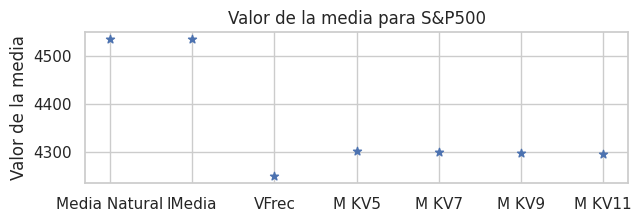

In [ ]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,2), 'figure.dpi':100})
vec_imp = ['Media Natural','IMedia','VFrec','M KV5','M KV7','M KV9','M KV11']
arr = Mmean.iloc[13]
plt.Figure(figsize=(2,3))
plt.scatter(vec_imp, arr,marker= '*')
plt.title('Valor de la media para S&P500')
plt.ylabel('Valor de la media')
plt.show()

Se observa que la media obtenida mediante la imputación de datos de valor más frecuente, presenta los valores más pequeños respecto a las estrategías comporadas. 

In [ ]:
Mstd= pd.DataFrame(data.std(), columns=['STD Natural'])
Mstd = Mstd.assign(Std_Media = data_IMedia.std(), V_Frecuentes = data_IVf.std(), KV5 = data_KN5.std(),KV7 = data_KN7.std(), KV9 = data_KN9.std(), KV11 = data_KN11.std())


Análisis similar se desarrolló con base en los valores obtenidos para la desviación estándar, sin embargo, la observación de las gráficas que se presentan a continuación, evidencia que los valores de la desviación estándar tienden a ser superiores incluso con los valores obtenidos de los datos en bruto.

In [ ]:
Mstd_dif = pd.DataFrame(abs(Mstd['STD Natural']-Mstd['Std_Media']),columns=['Dif_IMedia'])
Mstd_dif = Mstd_dif.assign(Dif_VFrec = abs(Mstd['STD Natural']-Mstd['V_Frecuentes']),
                    Dif_KV5 = abs(Mstd['STD Natural']- Mstd['KV5']),
                    Dif_KV7 = abs(Mstd['STD Natural'] - Mstd['KV7']),
                    Dif_KV9 = abs(Mstd['STD Natural'] - Mstd['KV9']),
                    Dif_KV11 = abs(Mstd['STD Natural'] - Mstd['KV11'])                    )
Mstd_dif

,Dif_IMedia,Dif_VFrec,Dif_KV5,Dif_KV7,Dif_KV9,Dif_KV11
Cierre,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apertura,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Máximo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mínimo,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
var%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Bitcoin,2369.605632,1928.380147,2237.220992,2282.506250,2110.251314,2201.484725
CAC40,8.499589,12.994988,6.560431,6.600008,6.675060,6.560558
DAX,40.172596,33.261108,6.937013,8.769716,10.538829,11.856796
DowJones,124.120951,16.764702,72.284645,70.678313,68.383664,66.316992
EuroStoxx50,107.999949,100.284853,73.914934,74.253073,72.708913,71.598072


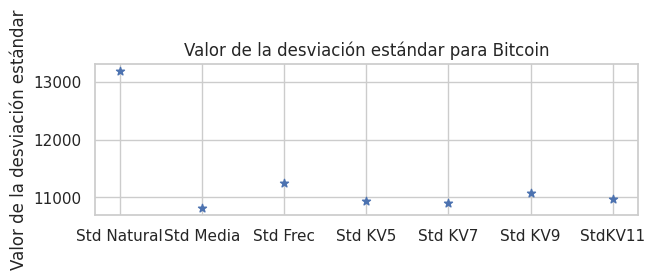

In [ ]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,2), 'figure.dpi':100})
vec_imp = ['Std Natural','Std Media','Std Frec','Std KV5','Std KV7','Std KV9','StdKV11']
arr = Mstd.iloc[5]
plt.scatter(vec_imp, arr,marker= '*')
plt.title('Valor de la desviación estándar para Bitcoin')
plt.ylabel('Valor de la desviación estándar')
plt.show()

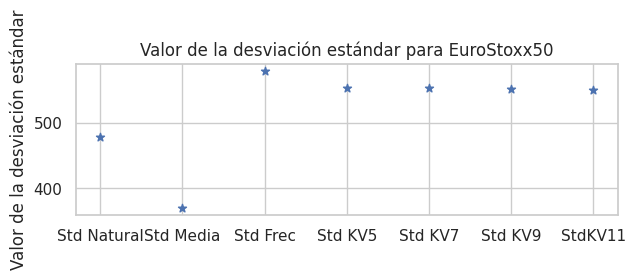

In [ ]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,2), 'figure.dpi':100})
vec_imp = ['Std Natural','Std Media','Std Frec','Std KV5','Std KV7','Std KV9','StdKV11']
arr = Mstd.iloc[9]
plt.scatter(vec_imp, arr,marker= '*')
plt.title('Valor de la desviación estándar para EuroStoxx50')
plt.ylabel('Valor de la desviación estándar')
plt.axis('tight')
plt.show()

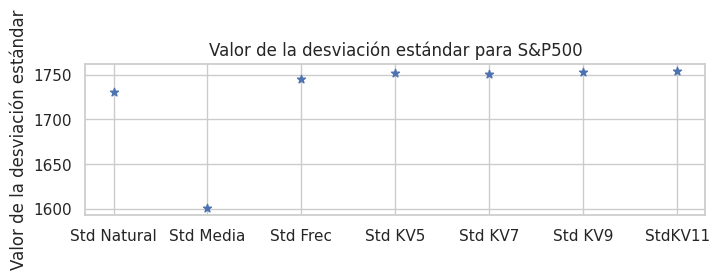

In [ ]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(8,2), 'figure.dpi':100})
vec_imp = ['Std Natural','Std Media','Std Frec','Std KV5','Std KV7','Std KV9','StdKV11']
arr = Mstd.iloc[13]
plt.scatter(vec_imp, arr,marker= '*')
plt.title('Valor de la desviación estándar para S&P500')
plt.ylabel('Valor de la desviación estándar')
plt.axis('tight')
plt.show()

# identificación de datos atípicos

Mediante los diagramas de caja que se presentan a continuación, es necesario resaltar puntualmente la variable Bitcoin. Dado el crecimiento acelerado que ha tenido en el último tiempo, es plausible pesar que estos datos son atípicos; por lo anterior, en este ejercicio no se propone una búsqueda y eliminación de este tipo de datos. 

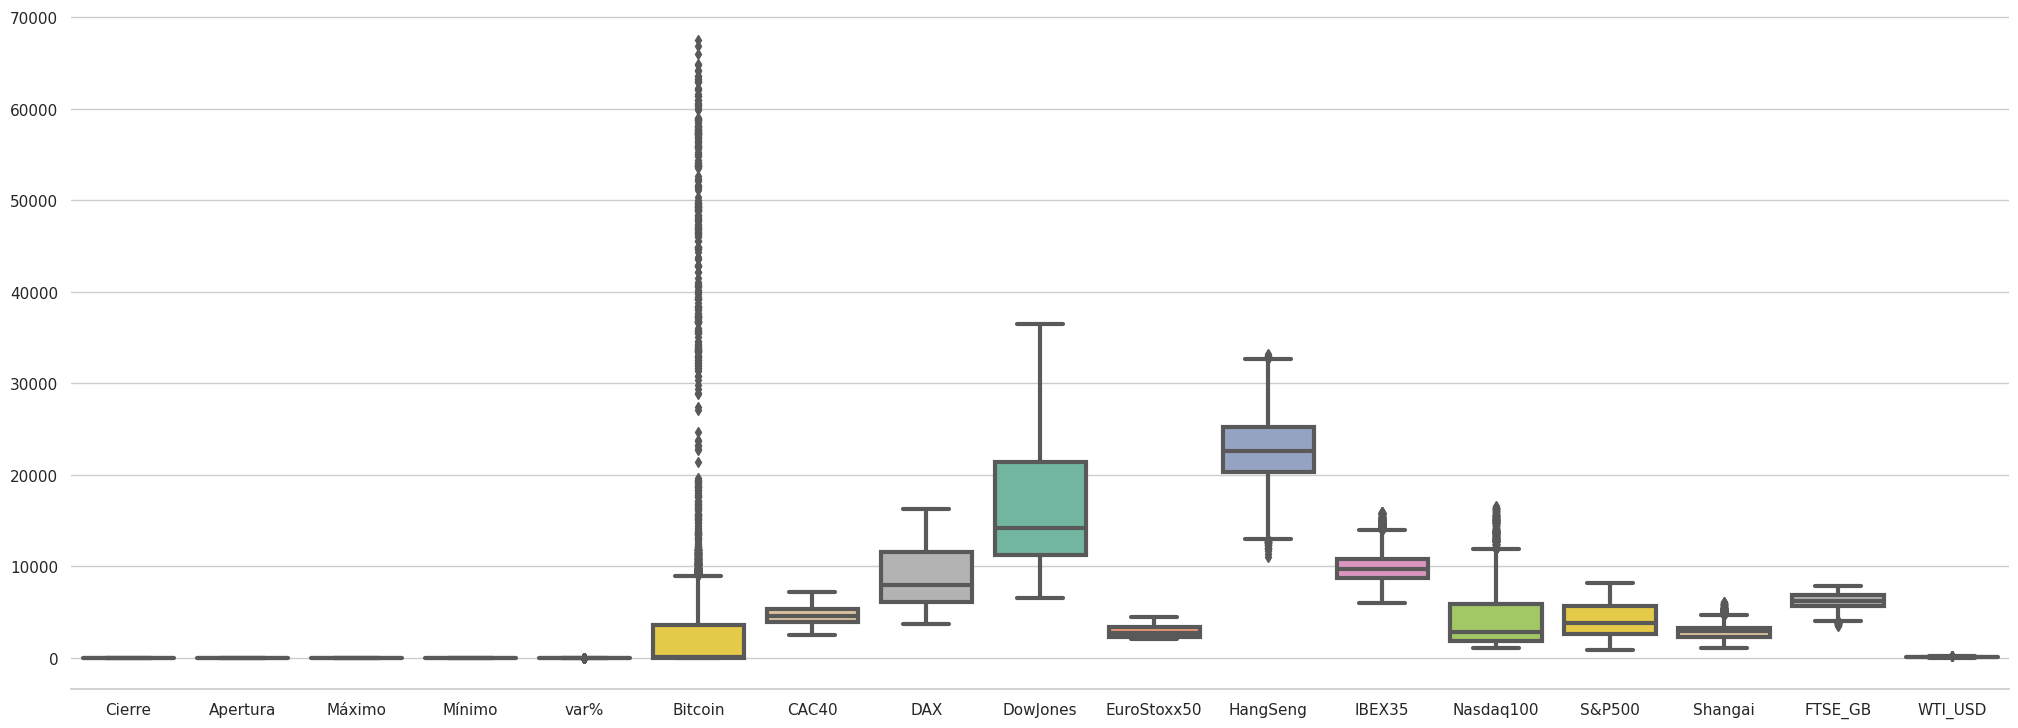

In [ ]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = data_IVf, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

# Estandarización de los datos

Se aplica al conjunt de datos la estandarización estándar, tal como se observa a continuación, a partir de ella, los datos se acomodan con su media alrededor de 0, y entre -4 y 6 para el valor mínimo y máximo, respectivamente. 

In [ ]:
Caracteristicas = ['Cierre','Apertura','Máximo','Mínimo','var%','Bitcoin','CAC40','DAX','DowJones','EuroStoxx50','HangSeng','IBEX35','Nasdaq100','S&P500','Shangai','FTSE_GB','WTI_USD']
scaler = StandardScaler()
data_IVf_SS = scaler.fit_transform(data_IVf)
data_IVf_SS = pd.DataFrame(data = data_IVf_SS, columns = Caracteristicas)
#data_IVf_Nl1

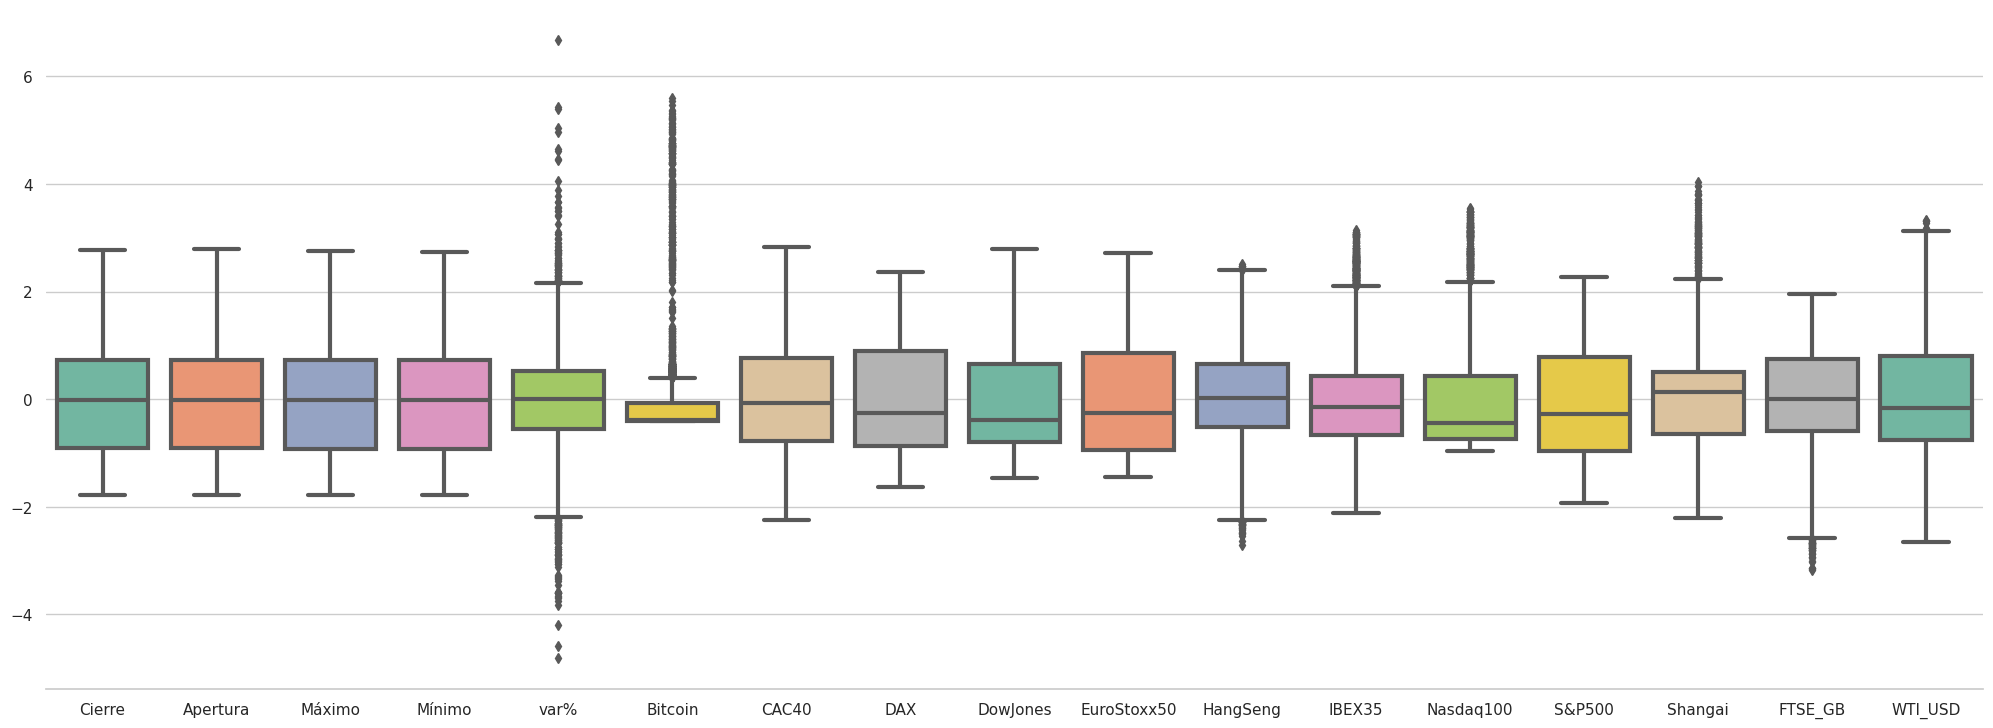

In [ ]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = data_IVf_SS, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

# Análisis multivariado de los datos

A continuación se presenta el gráfico de pares con las variables que contiene la base de datos. Particularmente, es de resaltar que, en los gráficos de dispersión que incluye las variables Bitcoin, EuroStoxx50 y S&P500, se evidencia los datos imputados. Para la entrega final de este proyecto, se realizarán los ajustes necesarios a los datos y especificamente a los métodos de imputación usados, con el objetivo de no interferir en las predicciones que realice el modelo. 

In [ ]:
graph = sns.PairGrid(data_IVf_SS, vars= ['CAC40','DAX','DowJones','EuroStoxx50','HangSeng','Nasdaq100','S&P500','Shangai','FTSE_GB','WTI_USD','Bitcoin'])
#DowJones','EuroStoxx50','HangSeng','IBEX35','Nasdaq100','S&P500','Shangai','FTSE_GB','WTI_USD'])  
graph.map_diag(plt.hist, alpha = 0.6)
graph.map_offdiag(plt.scatter, alpha = 0.5)
graph.add_legend() 

Output hidden; open in https://colab.research.google.com to view.

A partir de la matriz de covarianza, se observan las relaciones positivas y negativas entre las variables que componen la base de datos. 

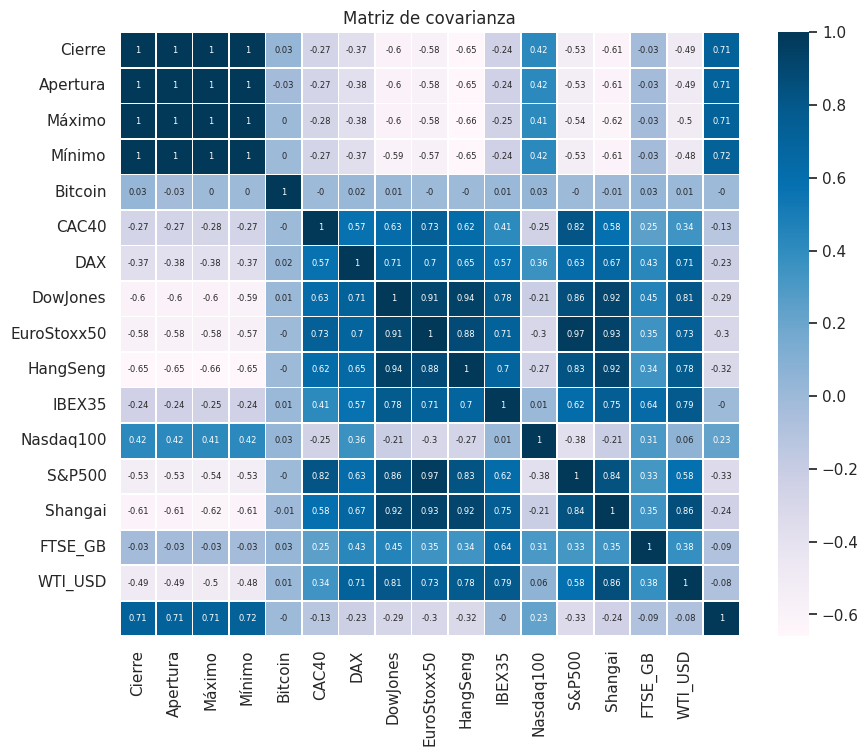

In [ ]:
MCova = np.round(np.cov(data_IVf_SS.transpose(), bias=True),2) 
Caracteristicas = ['Cierre','Apertura','Máximo','Mínimo','Bitcoin','CAC40','DAX','DowJones','EuroStoxx50','HangSeng','IBEX35','Nasdaq100','S&P500','Shangai','FTSE_GB','WTI_USD']

plt.figure(figsize=(10,8))
plt.title('Matriz de covarianza')
ax = sns.heatmap(MCova, annot=True, annot_kws={'size':6}, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas,cmap="PuBu", linewidths=.5)
plt.show()

La observación de la matriz de correlación indica, la fuerza y dirección de las relaciones entre variables. Obviando la diagonal princial, es evidente la alta correlación de las caracterísiticas Cierre, Apertura, Máximo y Mínimo, puesto que determinan la misma variable. Algunos índices bursatíles como el DowJones, S&P500, y HangSeng también presentan una alta correlación. 

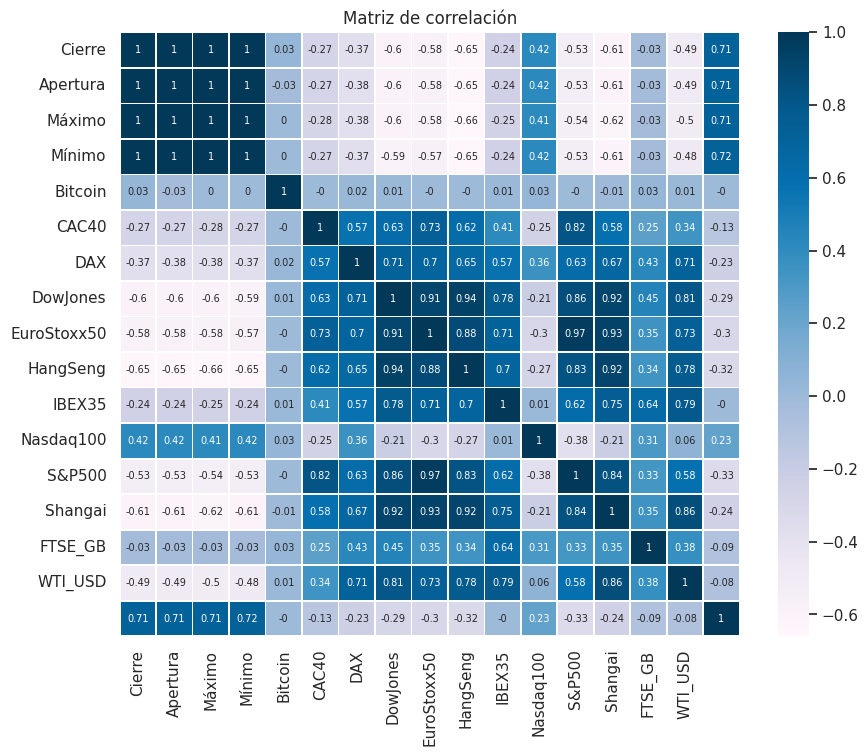

In [ ]:
Mcor = round(data_IVf_SS.corr(),2)
plt.figure(figsize=(10,8))
plt.title('Matriz de correlación')
ax = sns.heatmap(Mcor,annot=True, annot_kws={'size':7}, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas, cmap="PuBu",linewidths=.5)
plt.show()

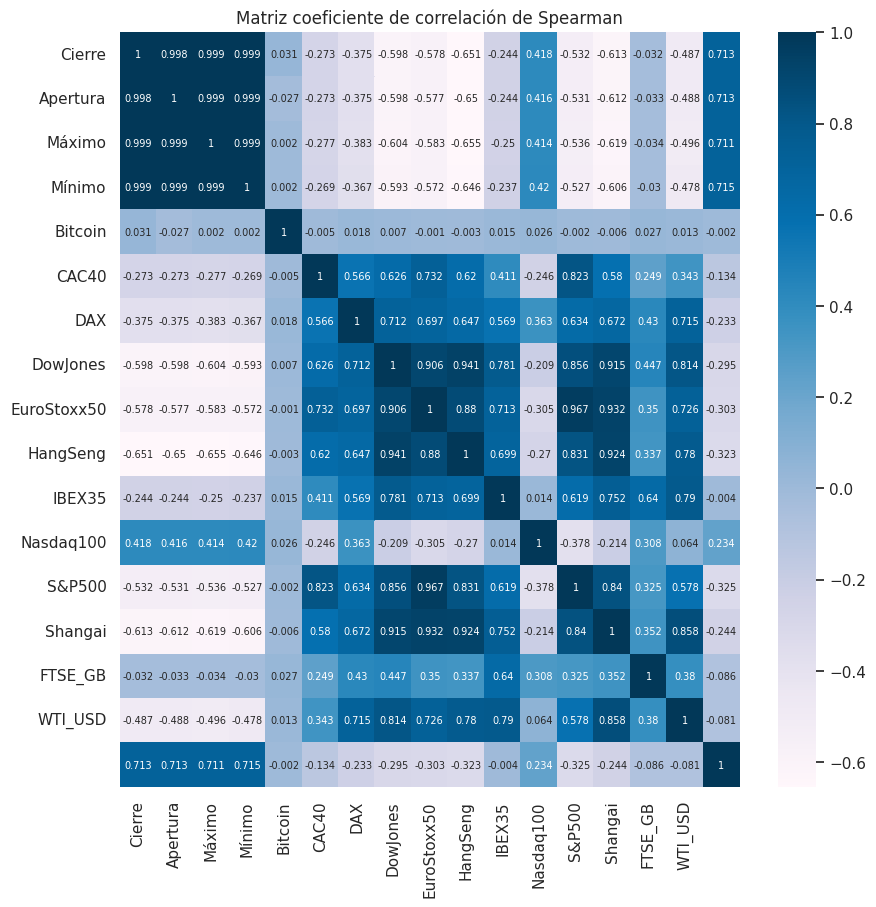

In [ ]:
r = []
valor_p = []
Datos_SS = data_IVf_SS.values
Datos_SS = np.asarray(data_IVf_SS)

for _,n in enumerate(np.arange(0,Datos_SS.shape[1])):
   for _,m in enumerate(np.arange(0,Datos_SS.shape[1])):  
       r_valor, p_valor = pearsonr(Datos_SS[:,n], Datos_SS[:,m])
       r.append(round(r_valor,3))
       valor_p.append(round(p_valor,3))

r = np.asarray(r)
valor_p = np.asarray(valor_p)

pearson_r = r.reshape(data_IVf_SS.shape[1],data_IVf_SS.shape[1])
p_value = valor_p.reshape(data_IVf_SS.shape[1],data_IVf_SS.shape[1])

plt.figure(figsize=(10,10))
plt.title('Matriz coeficiente de correlación de Spearman')
ax = sns.heatmap(pearson_r, annot=True, annot_kws={'size':7}, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas, cmap="PuBu")
plt.show()

La matriz de correlación arroja resultados similares a los presentados previamente

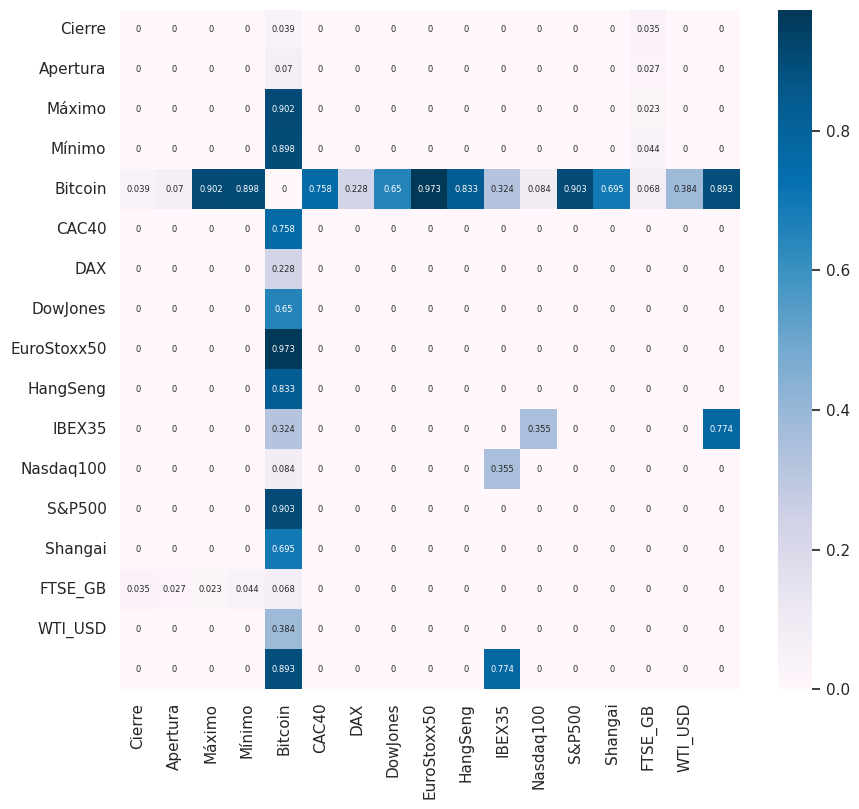

In [ ]:
plt.figure(figsize=(10,9))
ax = sns.heatmap(p_value, annot=True, annot_kws={'size':6}, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas, cmap = 'PuBu')
plt.show()

#Conclusiones




1.   Es necesario implementar nuevos métodos de imputación de datos, teniendo en cuenta las condición de cada una de las variables que componen el conjunto de datos
2.   En el diagrama de pares, se observó que la imputación de datos para las variables Bitcoin, S&P500 y EuroStoxx50, variables con las mayores tasas de datos faltantes, no termino de acoplarse correctamente con el comportamiento natural de los datos
3.   Las variables de Apertura, Máximo, Mínimo y Cierre presenta una alta correlación por lo que al menos 3 de ellas deberán ser descartadas para la implementación del algoritmo de clasificación. 

